# Data Science Toolbox Use-Case Project Covid-19

#### Group members
| Name | MatNr. | E-Mail |
|---|---|---|
|Tazio Faha         |396024|t.faha@campus.tu-berlin.de      |
|Jannis Kiesel      |459410|j.kiesel@campus.tu-berlin.de    |
|Yevheniia Vostres  |467678|y.vostres@campus.tu-berlin.de   |
|Ahmed Hussein      |401119|a.hussein@campus.tu-berlin.de   |
|Maarten Dohrwardt  |475540|m.dohrwardt@campus.tu-berlin.de |


### Guiding Questions and Topics
- Can you find any correlation between the government measures and COVID-19 cases and fatalities? 
    - Explore the already taken EU-wide government measures in the past and its correlation with COVID-19 cases and fatalities
- The following countries should be taken into account: 
    - Austria, Belgium, Denmark, France, Italy, Netherlands, Poland, Spain and Sweden
- What could be a valuable timeframe within the measures to see first results in the correlation?
- Do you find any correlation within measures “ClosPrim”, “ClosPubAny”, “IndoorOver500”, 
    - which were used several times, 
    - in the different countries?
- Does this correlation indicate causation and why?
- Can you find any trend in different demographics within the population (e.g. male/female) ?
- Think beyond what else could be analyzed from the data?

### Install Guide
Please have a look through our [README.md](./README.md)

Download the source files and add them in your repository.


### Data Sources
- [This source describes the eu goernmental measures](https://www.ecdc.europa.eu/en/publications-data/download-data-response-measures-covid-19)
    - [This is the actual measures dataset](https://www.ecdc.europa.eu/sites/default/files/documents/response_graphs_data_2022-05-05.csv)
    - [This is the Variable description on the different measures](https://www.ecdc.europa.eu/sites/default/files/documents/Variable_Dictionary_and_Disclaimer_non-pharmacautical_measures_v3.pdf)
- [This source describes the covid cases on a per day and country basis](https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country)
    - [This source is the actual covid case dataset for the european union](https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv)





In [46]:
countries_of_interest = ["Austria", "Belgium", "Denmark", "France", "Italy", "Netherlands", "Poland", "Spain", "Sweden"]
colours = ["#c0392b","#f1c40f","#8e44ad","#2980b9","#27ae60","#e67e22","#bdc3c7","#f39c12","#3498db"]
country_colors = {}
for c,colour in zip(countries_of_interest,colours):
    country_colors[c] = colour

In [2]:
import pandas as pd
measures_df = pd.read_csv("response_graphs_data_2022-05-05.csv",sep=",",parse_dates=[2,3])
measures_df["date_end"] = measures_df["date_end"].fillna(measures_df[["date_end","date_start"]].max().max())
measures_df["date_diff"] = (measures_df["date_end"]-measures_df["date_start"]).astype('timedelta64[D]')
measures_df

,Country,Response_measure,date_start,date_end,date_diff
0,Austria,AdaptationOfWorkplace,2020-03-16,2020-04-13,28.0
1,Austria,AdaptationOfWorkplace,2021-04-01,2022-04-30,394.0
2,Austria,BanOnAllEvents,2020-11-03,2021-05-18,196.0
3,Austria,ClosDaycare,2020-03-16,2020-05-04,49.0
4,Austria,ClosDaycare,2020-11-17,2020-12-07,20.0
...,...,...,...,...,...
2053,Sweden,QuarantineForInternationalTravellers,2021-01-22,2022-03-31,433.0
2054,Sweden,RestaurantsCafesPartial,2020-07-01,2021-09-28,454.0
2055,Sweden,RestaurantsCafesPartial,2022-01-12,2022-02-09,28.0
2056,Sweden,StayHomeRiskG,2020-04-01,2020-10-22,204.0


In [26]:
cases_and_deaths_df = pd.read_csv("data.csv",sep=",",parse_dates=["dateRep"],dayfirst=True)[["dateRep","countriesAndTerritories","cases","deaths","popData2020"]]
#cases_df = cases_df.set_index(["dateRep","countriesAndTerritories"])
cases_df = cases_and_deaths_df[["dateRep","countriesAndTerritories","cases"]].pivot(index="dateRep",columns="countriesAndTerritories")["cases"].reset_index()
deaths_df = cases_and_deaths_df[["dateRep","countriesAndTerritories","deaths"]].pivot(index="dateRep",columns="countriesAndTerritories")["deaths"].reset_index()

cases_df.set_index("dateRep", inplace=True)
deaths_df.set_index("dateRep",inplace=True)
cases_df.columns.name = None
deaths_df.columns.name = None
cases_df.index.name = None
deaths_df.index.name = None

In [7]:
cases_df.head(10)

,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Malta,Netherlands,Norway,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


<AxesSubplot:>

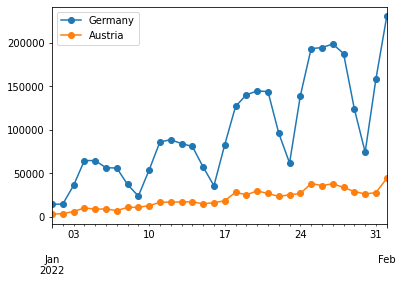

In [8]:
cases_df[["Germany","Austria"]]["2022-01-01":"2022-02-01"].plot(style="-o")

<AxesSubplot:>

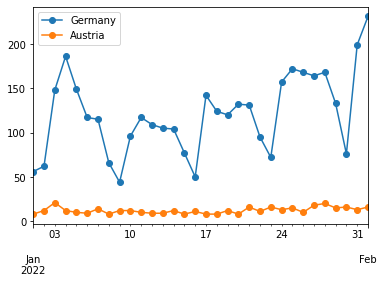

In [9]:
deaths_df[["Germany","Austria"]]["2022-01-01":"2022-02-01"].plot(style="-o")

In [11]:
population_df = cases_and_deaths_df[["countriesAndTerritories","popData2020"]].groupby("countriesAndTerritories").mean()

population_df
#population_df.loc["Austria"].values[0]


,popData2020
countriesAndTerritories,
Austria,8901064.0
Belgium,11522440.0
Bulgaria,6951482.0
Croatia,4058165.0
Cyprus,888005.0
Czechia,10693939.0
Denmark,5822763.0
Estonia,1328976.0
Finland,5525292.0


In [12]:
def calc_incidence(country_series:pd.Series,population_df:pd.DataFrame) -> pd.Series:
    country_pop = population_df.loc[country_series.name].values[0]
    incidence_7d_series = country_series.copy()
    incidence_7d_series.name = "incidence7days"
    for d in range(len(country_series)):
        sum_last_seven_cases = country_series[max(0,d-7):d].sum()
        incidence_7d_series[d] = (sum_last_seven_cases/country_pop)*100000
    return incidence_7d_series

In [13]:
case_incidence_7_days_df = cases_df.apply(lambda x: calc_incidence(x,population_df=population_df),axis=0)
death_incidence_7_days_df = deaths_df.apply(lambda x: calc_incidence(x,population_df=population_df),axis=0)

<AxesSubplot:>

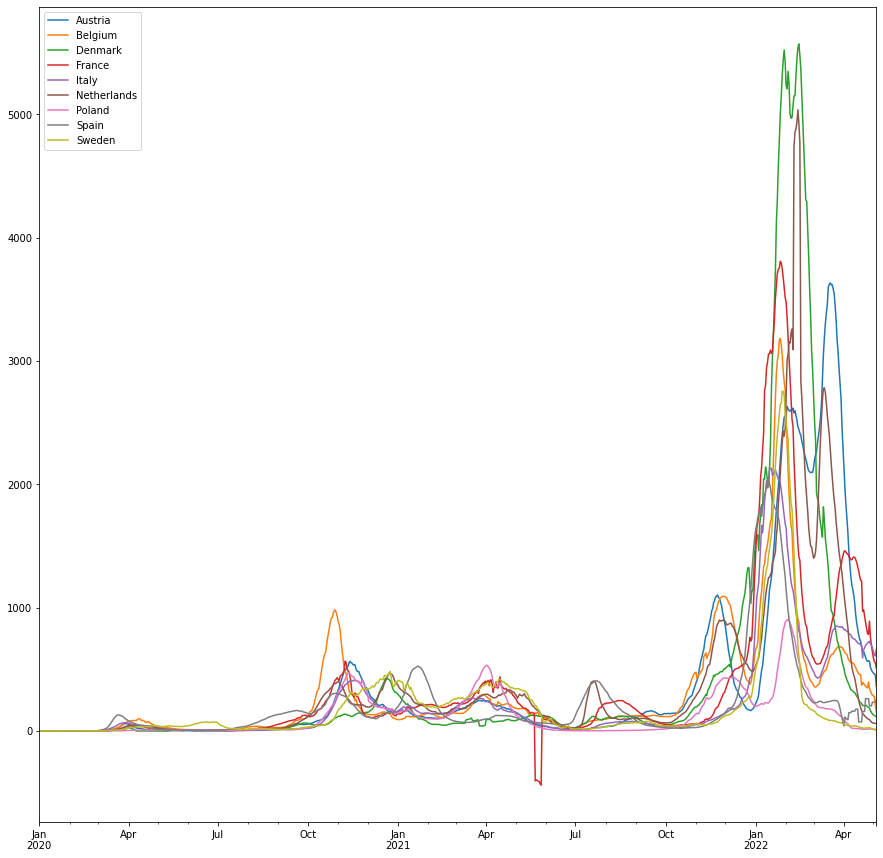

In [14]:
case_incidence_7_days_df[countries_of_interest].plot(figsize=(15,15))

<AxesSubplot:>

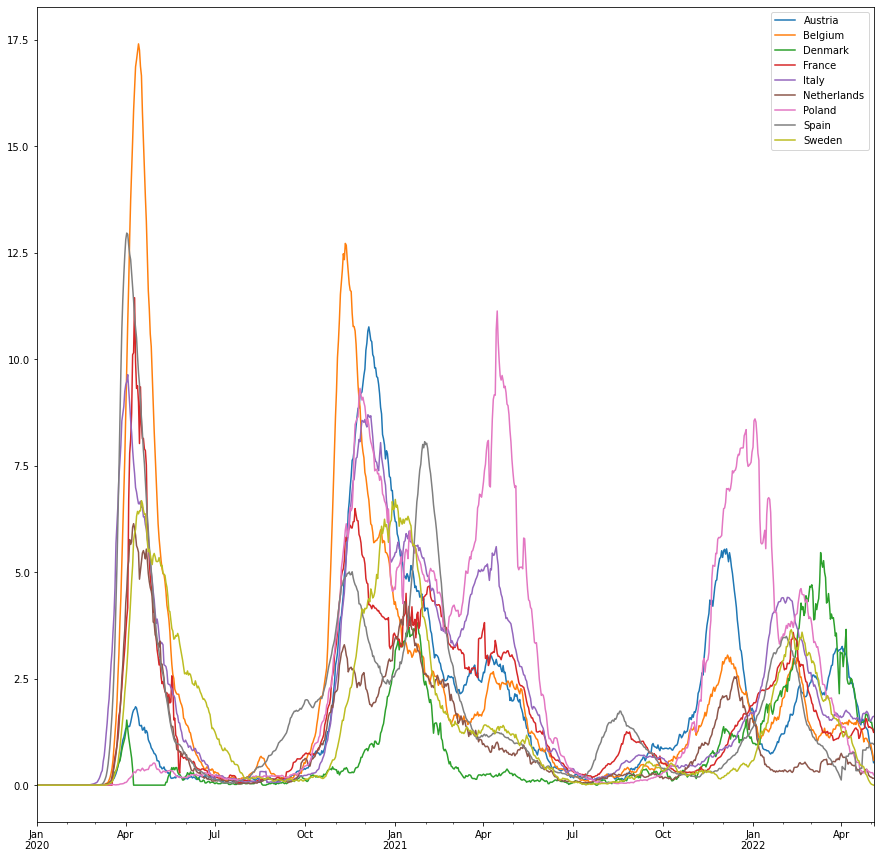

In [15]:
death_incidence_7_days_df[countries_of_interest].plot(figsize=(15,15))

In [16]:
def plot_gantt_measures():
    pass

    Country       Response_measure date_start   date_end  date_diff
68  Austria  Austria StayHomeOrder 2021-04-01 2021-05-02       31.0
75  Austria  Austria StayHomeOrder 2020-03-16 2020-04-30       45.0
76  Austria  Austria StayHomeOrder 2020-11-17 2020-12-06       19.0
77  Austria  Austria StayHomeOrder 2020-12-26 2021-02-07       43.0
78  Austria  Austria StayHomeOrder 2021-11-15 2021-12-26       41.0
79  Austria  Austria StayHomeOrder 2022-01-01 2022-01-31       30.0
80  Austria  Austria StayHomeOrder 2020-11-03 2020-11-16       13.0
81  Austria  Austria StayHomeOrder 2020-12-07 2020-12-25       18.0
82  Austria  Austria StayHomeOrder 2021-02-08 2021-05-15       96.0
83  Austria  Austria StayHomeOrder 2021-12-27 2021-12-31        4.0
    Country      Response_measure date_start   date_end  date_diff
675  France  France StayHomeOrder 2020-10-17 2020-10-28       11.0
676  France  France StayHomeOrder 2021-02-26 2021-03-19       21.0
677  France  France StayHomeOrder 2021-07-30 2022-0

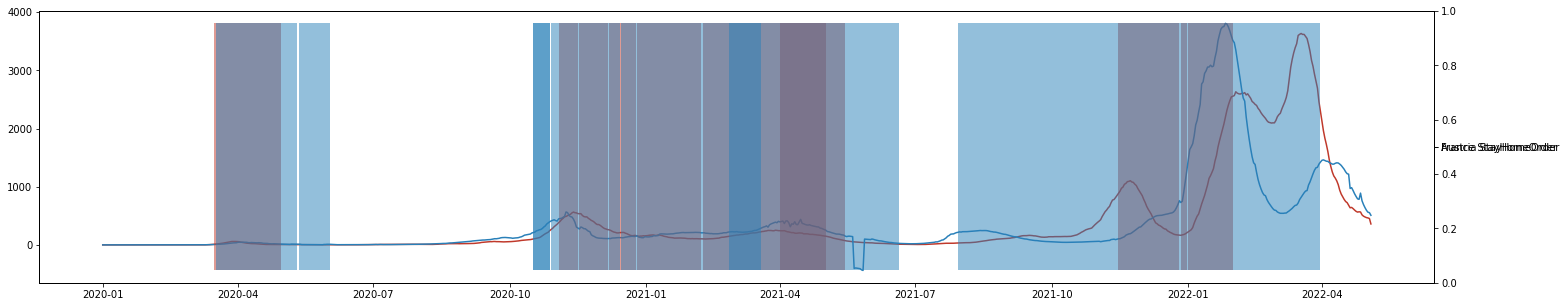

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
def plot_measure_over_incidence(measure_name:str,countries_of_interest = countries_of_interest,incidence_df = case_incidence_7_days_df, measures_df = measures_df,country_colors=country_colors):
    fig, ax1 = plt.subplots(1,figsize=(25,5))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2 = ax1.twinx()
    pd.options.mode.chained_assignment = None  # default='warn'
    for c in countries_of_interest:
        country_measure_df = measures_df[(measures_df["Country"]==c) & (measures_df["Response_measure"].str.contains(measure_name,case=False))]
        country_measure_df["Response_measure"] = f"{c} {measure_name}"
        print(country_measure_df)

        ax1.plot(incidence_df[c],color=country_colors[c],label=c)
        ax2 = ax1.twinx()
        ax2.barh(country_measure_df["Response_measure"],width=country_measure_df["date_diff"],left=country_measure_df["date_start"],alpha=0.5,color=country_colors[c])
    #fig.show()
    pd.options.mode.chained_assignment = "warn"  # default='warn'
plot_measure_over_incidence("StayHomeOrder",["Austria","France"])


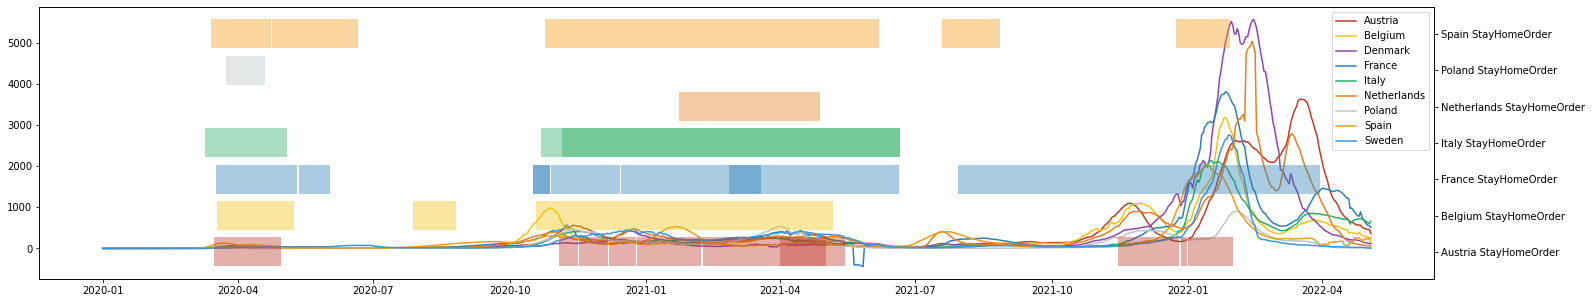

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
def plot_measure_over_incidence(measure_name:str,countries_of_interest = countries_of_interest,incidence_df = case_incidence_7_days_df, measures_df = measures_df,country_colours=country_colors):
    fig, ax1 = plt.subplots(1,figsize=(25,5))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2 = ax1.twinx()
    pd.options.mode.chained_assignment = None  # default='warn'
    country_measure_df = pd.DataFrame()
    for c in countries_of_interest:
        add_country_measure_df = measures_df[(measures_df["Country"]==c) & (measures_df["Response_measure"].str.contains(measure_name,case=False))]
        add_country_measure_df["Response_measure"] = f"{c} {measure_name}"
        add_country_measure_df["colour"] = country_colours[c]
        country_measure_df = pd.concat([country_measure_df,add_country_measure_df])

    ax2.barh(country_measure_df["Response_measure"],width=country_measure_df["date_diff"],left=country_measure_df["date_start"],alpha=0.4,color=country_measure_df["colour"])
    for c in countries_of_interest:
        ax1.plot(incidence_df[c],color=country_colors[c],label=c)
    #fig.show()
    ax1.legend()
    pd.options.mode.chained_assignment = "warn"  # default='warn'
plot_measure_over_incidence("StayHomeOrder")

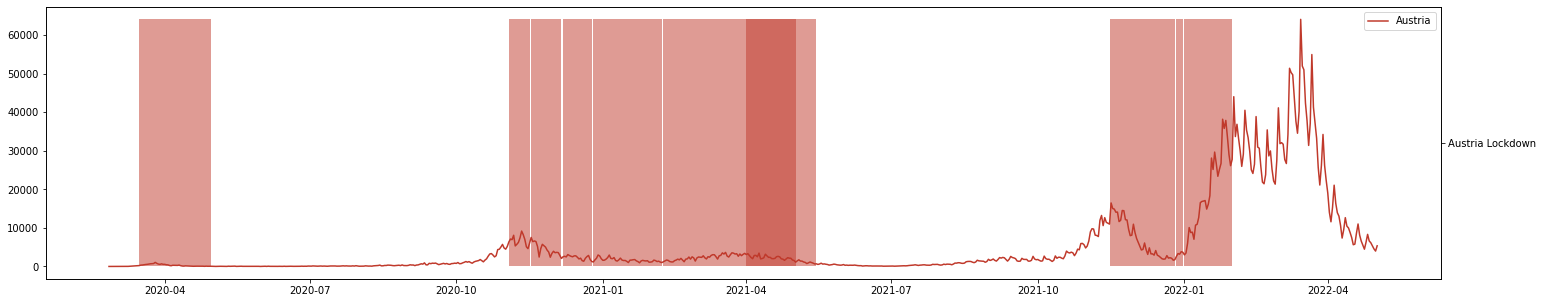

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax1 = plt.subplots(1,figsize=(25,5))
country_df = measures_df[(measures_df["Country"]=="Austria") & (measures_df["Response_measure"].str.contains("StayHomeOrder",case=False))]

pd.options.mode.chained_assignment = None  # default='warn'
country_df["Response_measure"] = "Austria Lockdown"
pd.options.mode.chained_assignment = "warn"  # default='warn'

ax1.plot(cases_df["Austria"],color=country_colors["Austria"],label="Austria")
ax1.legend()

ax2 = ax1.twinx()

ax2.barh(country_df["Response_measure"],width=country_df["date_diff"],left=country_df["date_start"],alpha=0.5,color=country_colors["Austria"],label="Austria_Lockdown")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))